<a href="https://colab.research.google.com/github/ramadhanbay/kuliah/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import section**

In [241]:
import pandas as pd
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from itertools import product
import numpy as np

# **Data Preprocessing section**



In [163]:
df=pd.read_csv('/content/drive/MyDrive/Kuliah/Visulalisasi Analitik/spotify.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [164]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])
#df['years_since_release'] = datetime.now().year - df['track_album_release_date'].dt.year
df['year_release'] = df['track_album_release_date'].dt.year

In [165]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year_release
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019


In [166]:
df.drop(['track_name', 'track_artist','track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'danceability','energy',  'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms' ], axis=1, inplace=True)

In [167]:
df.isna().sum()

track_id             0
track_popularity     0
playlist_subgenre    0
year_release         0
dtype: int64

In [168]:
df.nunique()

track_id             28356
track_popularity       101
playlist_subgenre       24
year_release            63
dtype: int64

In [169]:
df['track_id'].duplicated().sum()

4477

In [170]:
df.drop_duplicates(inplace=True)

In [171]:
le = LabelEncoder()

df['track_id'] = le.fit_transform(df['track_id'])
df['playlist_genre_label'] =df['playlist_subgenre']
df['playlist_genre'] = le.fit_transform(df['playlist_subgenre'])
df.drop(['playlist_subgenre'], axis=1, inplace=True)

In [172]:
df.shape

(32833, 5)

In [173]:
fig=px.imshow(df.corr(),text_auto=True,height=800,width=800,color_continuous_scale=px.colors.sequential.Greens,aspect='auto',title='<b>paiwise correlation of columns')
fig.update_layout(title_x=0.5)
fig.show()

<ipython-input-173-0c692ba0040e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# **K-Means**

In [174]:
kmeans_df = df.copy()

In [175]:
kmeans_df.head()

,track_id,track_popularity,year_release,playlist_genre_label,playlist_genre
0,24150,66,2019,dance pop,3
1,3061,67,2019,dance pop,3
2,7219,70,2019,dance pop,3
3,25699,60,2019,dance pop,3
4,5987,69,2019,dance pop,3


Text(0.5, 0, 'Attributes')

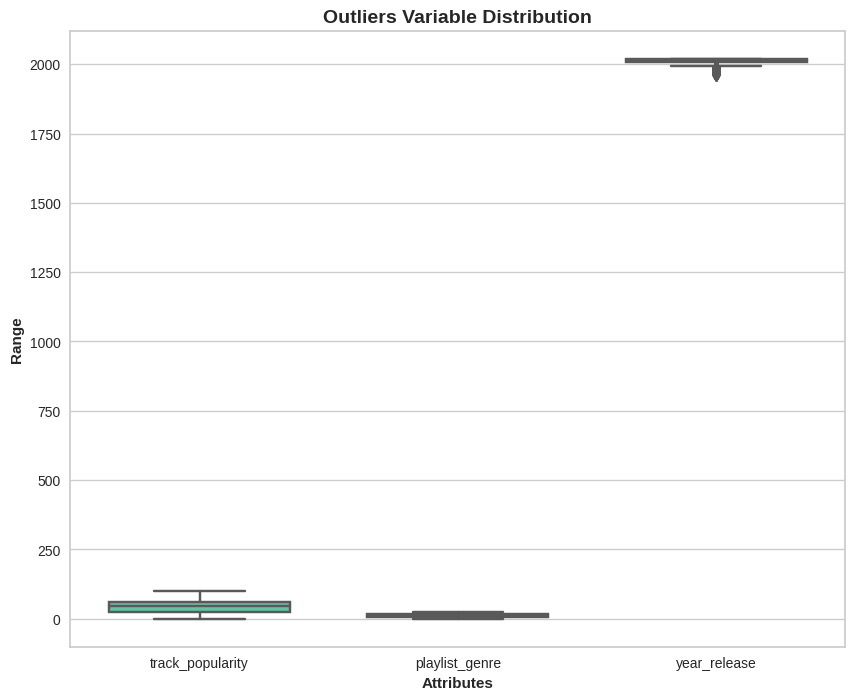

In [176]:
attributes = ['track_popularity','playlist_genre', 'year_release']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = kmeans_df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [177]:
# Removing (statistical) outliers for track_popularity
Q1 = kmeans_df.track_popularity.quantile(0.05)
Q3 = kmeans_df.track_popularity.quantile(0.95)
IQR = Q3 - Q1
kmeans_df = kmeans_df[(kmeans_df.track_popularity >= Q1 - 1.5*IQR) & (kmeans_df.track_popularity <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for playlist_genre
Q1 = kmeans_df.playlist_genre.quantile(0.05)
Q3 = kmeans_df.playlist_genre.quantile(0.95)
IQR = Q3 - Q1
kmeans_df = kmeans_df[(kmeans_df.playlist_genre >= Q1 - 1.5*IQR) & (kmeans_df.playlist_genre <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for duration_ms
#Q1 = df.duration_ms.quantile(0.05)
#Q3 = df.duration_ms.quantile(0.95)
#IQR = Q3 - Q1
#df = df[(df.duration_ms >= Q1 - 1.5*IQR) & (df.duration_ms <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for years_since_release
#Q1 = df.years_since_release.quantile(0.05)
#Q3 = df.years_since_release.quantile(0.95)
#IQR = Q3 - Q1
#df = df[(df.years_since_release >= Q1 - 1.5*IQR) & (df.years_since_release <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for year_release
Q1 = kmeans_df.year_release.quantile(0.05)
Q3 = kmeans_df.year_release.quantile(0.95)
IQR = Q3 - Q1
kmeans_df = kmeans_df[(kmeans_df.year_release >= Q1 - 1.5*IQR) & (kmeans_df.year_release <= Q3 + 1.5*IQR)]

In [178]:
# Rescaling Atribute
rfm_df = kmeans_df[['track_popularity','playlist_genre', 'year_release']]
# Instantiate
scaler = StandardScaler()
# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(32833, 3)

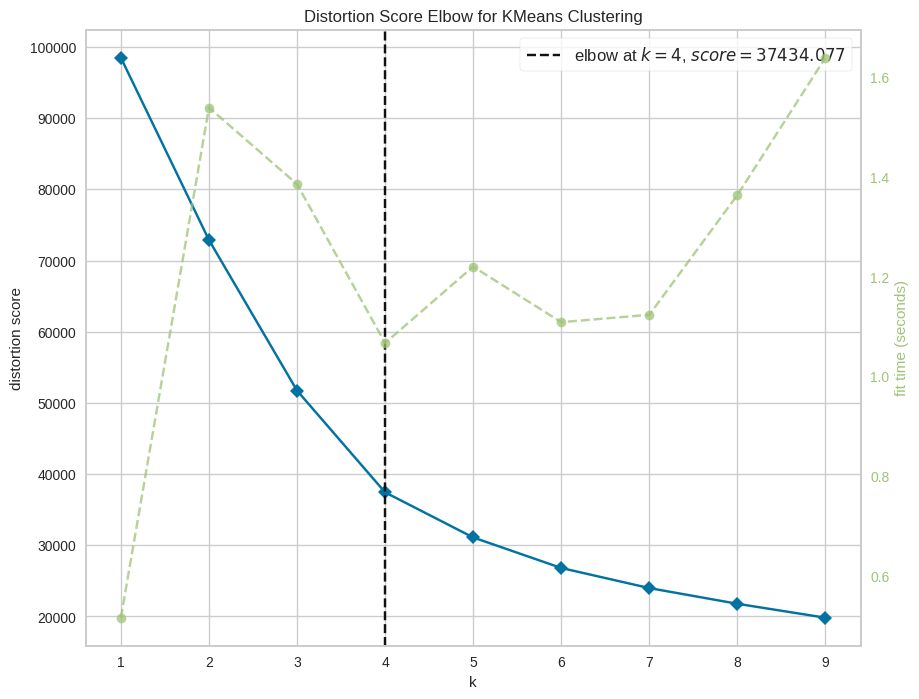

In [193]:
model = KMeans(random_state=1, n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(rfm_df_scaled)
visualizer.show()
plt.show()

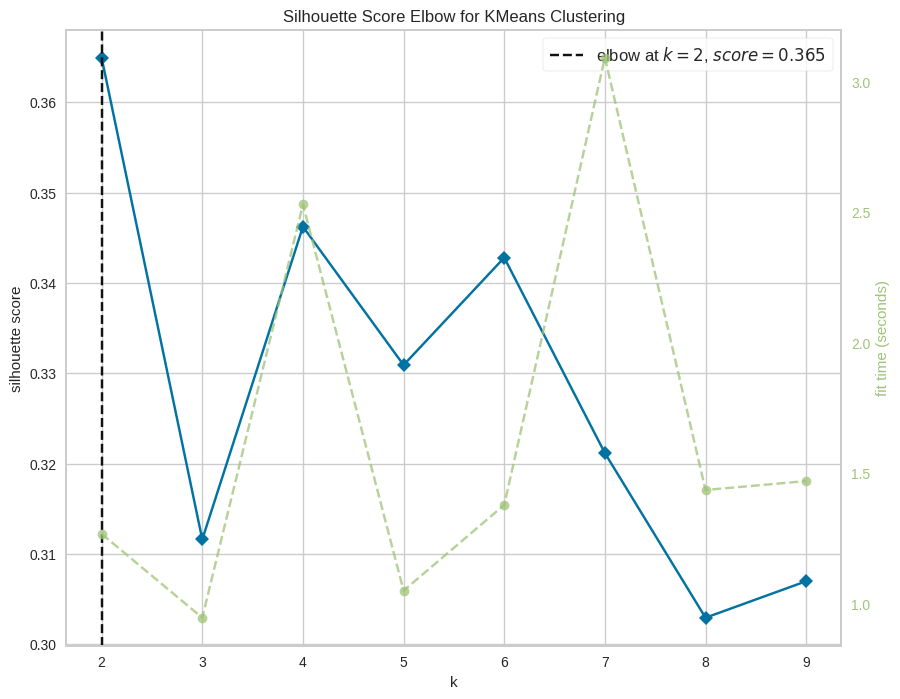

In [196]:
model = KMeans(random_state=1, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(rfm_df_scaled)
visualizer.show()
plt.show()

In [197]:
# Final model with k=2
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10)
kmeans.fit(rfm_df_scaled)
# Assign the label
kmeans_df['Cluster_Id'] = kmeans.labels_
kmeans_df.head()

,track_id,track_popularity,year_release,playlist_genre_label,playlist_genre,Cluster_Id
0,24150,66,2019,dance pop,3,1
1,3061,67,2019,dance pop,3,1
2,7219,70,2019,dance pop,3,1
3,25699,60,2019,dance pop,3,1
4,5987,69,2019,dance pop,3,1


In [209]:
genreDF = kmeans_df[['playlist_genre_label', 'playlist_genre']]
genreDF.drop_duplicates(inplace=True)
df['playlist_genre'] = df['playlist_genre'].astype(int)
genreDF_Sorted = genreDF.sort_values(by='playlist_genre', ascending=True)
print(genreDF_Sorted)

            playlist_genre_label  playlist_genre
11253                 album rock               0
28301                   big room               1
12318               classic rock               2
0                      dance pop               3
26790              electro house               4
2427                  electropop               5
8504                gangster rap               6
14719                  hard rock               7
5507                     hip hop               8
22764                    hip pop               9
3835             indie poptimism              10
19703              latin hip hop              11
17492                  latin pop              12
25153                   neo soul              13
24020             new jack swing              14
13614             permanent wave              15
29507                    pop edm              16
1298               post-teen pop              17
31024  progressive electro house              18
18754               

<ipython-input-209-97ce52a2f8db>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Cluster_Id', ylabel='year_release'>

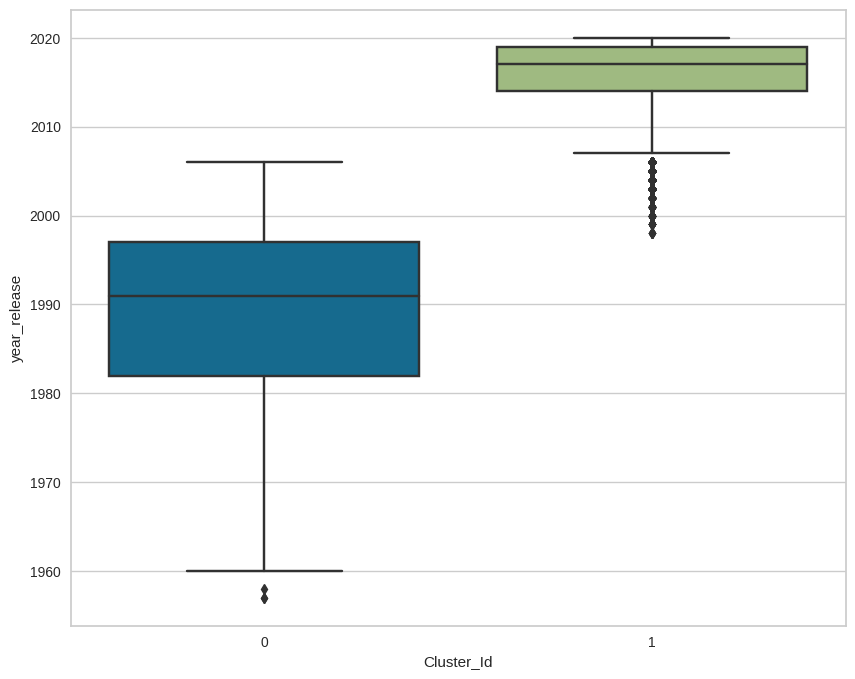

In [198]:
# Boxplot untuk memvisualisasikan Cluster Id dan year_release
sns.boxplot(x='Cluster_Id', y='year_release', data=kmeans_df)
#sns.scatterplot(y='track_popularity', x='year_release',
#                data=kmeans_df,
#                hue='Cluster_Id',  legend='full', s=45)

<Axes: xlabel='Cluster_Id', ylabel='playlist_genre'>

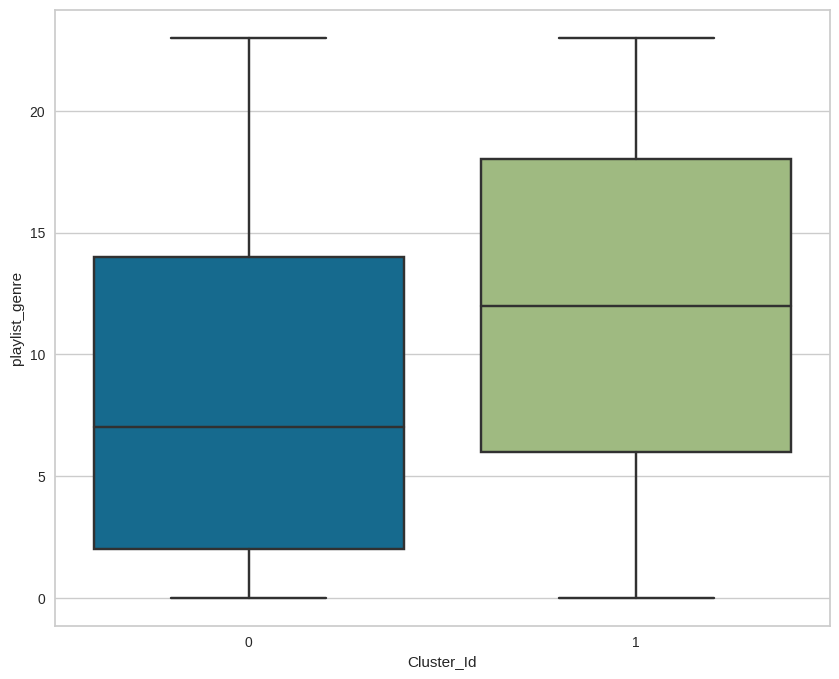

In [199]:
# Boxplot untuk memvisualisasikan Cluster Id dan playlist_genre
sns.boxplot(x='Cluster_Id', y='playlist_genre', data=kmeans_df)
#sns.scatterplot(y='playlist_genre', x='year_release',
#                data=kmeans_df,
#                hue='Cluster_Id',  legend='full', s=45)

<Axes: xlabel='Cluster_Id', ylabel='track_popularity'>

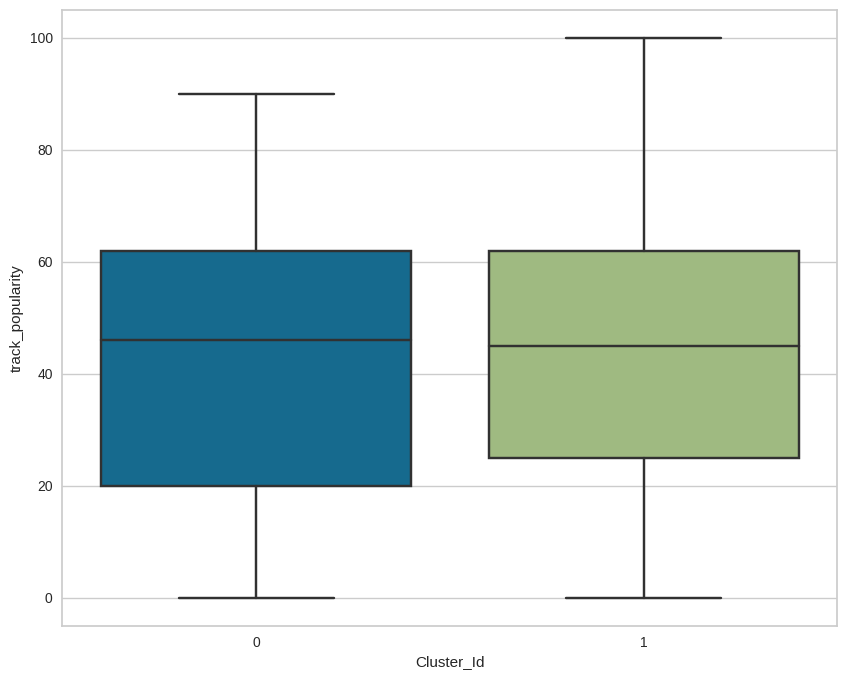

In [200]:
# Boxplot untuk memvisualisasikan Cluster Id dan track_popularity
sns.boxplot(x='Cluster_Id', y='track_popularity', data=kmeans_df)

# **DBScan**

In [225]:
dbscan_df = df.copy()
dbscan_df.drop(['playlist_genre_label'], axis=1, inplace=True)

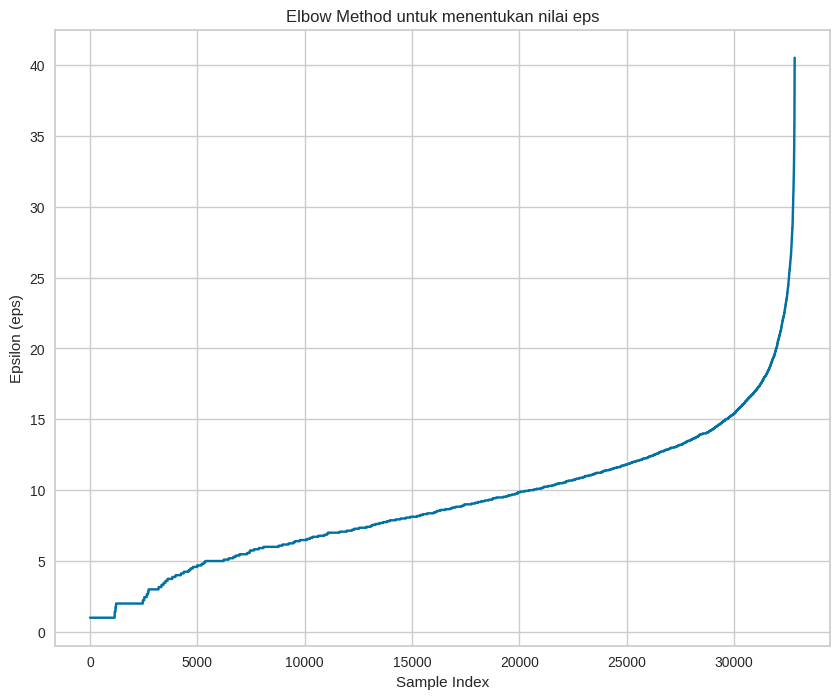

In [226]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dbscan_df)
distances, indices = neighbors_fit.kneighbors(dbscan_df)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

plt.title('Elbow Method untuk menentukan nilai eps')
plt.xlabel('Sample Index')
plt.ylabel('Epsilon (eps)')
plt.show()

In [234]:
eps_values = np.arange(2,50,3) # eps values to be investigated
min_samples = np.arange(2,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [235]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(dbscan_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    #sil_score.append(silhouette_score(dbscan_df, DBS_clustering.labels_))

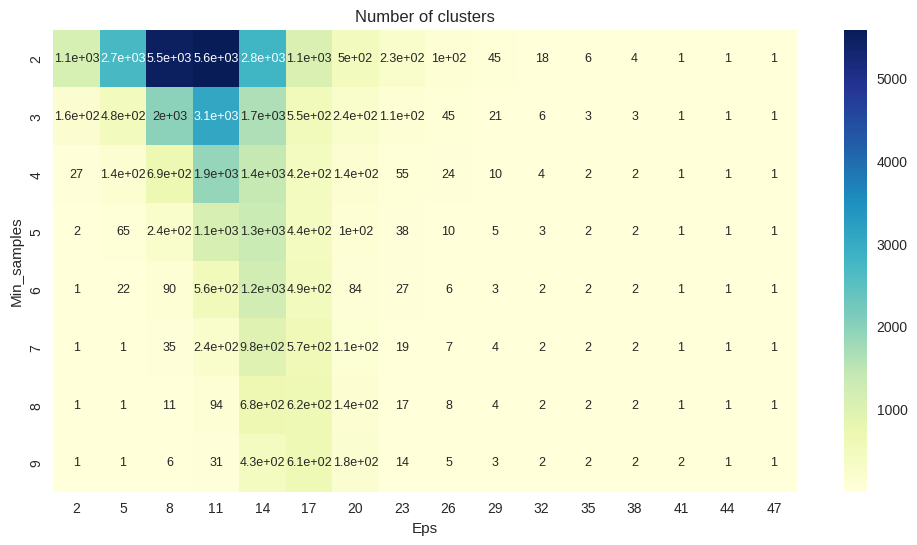

In [236]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 9}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [237]:
DBS_clustering = DBSCAN(eps=38, min_samples=2).fit(dbscan_df)

DBSCAN_clustered = dbscan_df.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [238]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,8
0,32820
1,2
2,3


# **Affinity** **Propagation**

In [244]:
ap_df = df.copy()
ap_df.drop(['playlist_genre_label'], axis=1, inplace=True)

In [ ]:
no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(ap_df)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(ap_df, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores